In [1]:
import multiprocessing
multiprocessing.set_start_method("fork")

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pystan
%matplotlib inline

In [3]:
plt.style.use("ggplot")

In [4]:
df = pd.read_excel("./data/real_estate1.xlsx")

In [5]:
df.head()

,id,space,room,value
0,1,50,2LDK,3050
1,2,70,2LDK,4690
2,3,70,2SLDK,4830
3,4,70,3LDK,5040
4,5,90,3LDK,6570


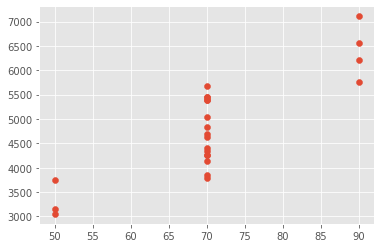

In [6]:
plt.scatter(df["space"],df["value"]);

N:サンプル数  
X:説明変数（広さ）  
Y:目的変数（価格）

In [7]:
stan_model = """
data {
  int N;
  real X[N];
  real Y[N];
}

parameters {
  real a;
  real b;
  real<lower=0> sigma;
}

model {
  for (n in 1:N){
    Y[n] ~ normal(a * X[n] + b, sigma);
  }
}

"""

In [8]:
sm = pystan.StanModel(model_code = stan_model)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_1ef597a9137b242c406fc64a47bf328b NOW.
In file included from /var/folders/b2/qd1flk0n1g975j_2k2fptczc0000gn/T/pystan_ivu_o7jm/stanfit4anon_model_1ef597a9137b242c406fc64a47bf328b_4780163216085706978.cpp:777:
In file included from /Users/sueno/PythonWP/venv3.8.13/lib/python3.8/site-packages/numpy/core/include/numpy/arrayobject.h:5:
In file included from /Users/sueno/PythonWP/venv3.8.13/lib/python3.8/site-packages/numpy/core/include/numpy/ndarrayobject.h:12:
In file included from /Users/sueno/PythonWP/venv3.8.13/lib/python3.8/site-packages/numpy/core/include/numpy/ndarraytypes.h:1960:
/Users/sueno/PythonWP/venv3.8.13/lib/python3.8/site-packages/numpy/core/include/numpy/npy_1_7_deprecated_api.h:17:2: warning: "Using deprecated NumPy API, disable it with "          "#define NPY_NO_DEPRECATED_API NPY_1_7_API_VERSION" [-W#warnings]
#warning "Using deprecated NumPy API, disable it with " \
 ^
In file included from /var/folders/b2/qd1flk0n1

In [10]:
stan_data = {"N":df.shape[0], "X":df["space"],"Y":df["value"]}

In [11]:
fit = sm.sampling(data = stan_data, iter=2000, warmup=500, chains = 3, seed=123)


Gradient evaluation took 3.8e-05 seconds
1000 transitions using 10 leapfrog steps per transition would take 0.38 seconds.
Adjust your expectations accordingly!


Iteration:    1 / 2000 [  0%]  (Warmup)

Gradient evaluation took 2.3e-05 seconds
1000 transitions using 10 leapfrog steps per transition would take 0.23 seconds.
Adjust your expectations accordingly!


Iteration:    1 / 2000 [  0%]  (Warmup)

Gradient evaluation took 3.5e-05 seconds
1000 transitions using 10 leapfrog steps per transition would take 0.35 seconds.
Adjust your expectations accordingly!


Iteration:    1 / 2000 [  0%]  (Warmup)
Iteration:  200 / 2000 [ 10%]  (Warmup)
Iteration:  200 / 2000 [ 10%]  (Warmup)
Iteration:  400 / 2000 [ 20%]  (Warmup)
Iteration:  200 / 2000 [ 10%]  (Warmup)
Iteration:  400 / 2000 [ 20%]  (Warmup)
Iteration:  501 / 2000 [ 25%]  (Sampling)
Iteration:  501 / 2000 [ 25%]  (Sampling)
Iteration:  400 / 2000 [ 20%]  (Warmup)
Iteration:  700 / 2000 [ 35%]  (Sampling)
Iteration:  501 / 2000 [ 

In [12]:
fit

Inference for Stan model: anon_model_1ef597a9137b242c406fc64a47bf328b.
3 chains, each with iter=2000; warmup=500; thin=1; 
post-warmup draws per chain=1500, total post-warmup draws=4500.

        mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
a      79.03    0.34  11.64  55.52  71.61  78.88  86.74  102.2   1175    1.0
b     -764.1   24.21 834.46  -2433  -1315 -764.7 -230.8 907.49   1188    1.0
sigma 614.85    2.95 106.34  447.4 540.73 601.81 673.65 855.25   1303    1.0
lp__  -152.0    0.04   1.35 -155.3 -152.6 -151.6 -151.0 -150.5   1096    1.0

Samples were drawn using NUTS at Thu Mar 31 16:59:13 2022.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).

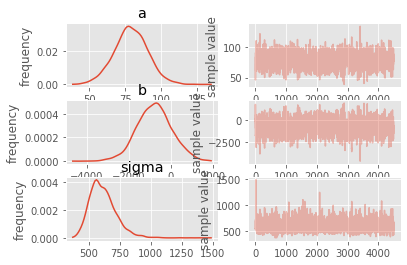

In [13]:
fig = fit.plot()

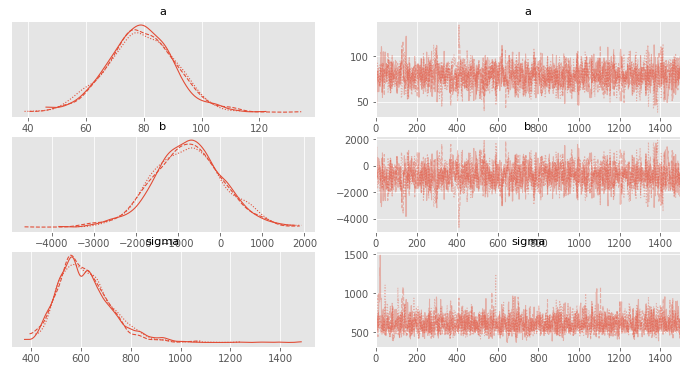

In [14]:
import arviz
arviz.plot_trace(fit);

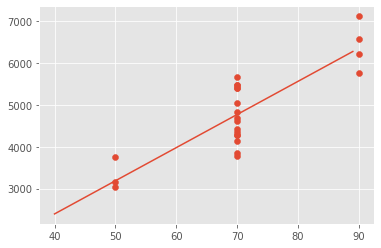

In [15]:
a = 79.03  # 78.3
b = -764.1  # -713.7
x = np.arange(40,90,1)
y = a * x + b
plt.plot(x,y)
plt.scatter(df["space"],df["value"])

/Users/sueno/PythonWP/venv3.8.13/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


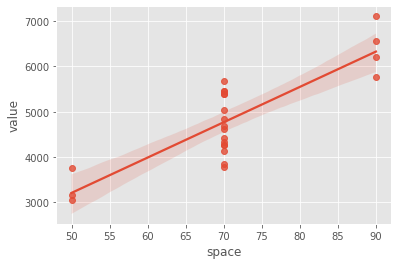

In [16]:
import seaborn as sns
sns.regplot(df["space"],df["value"]);